## Analisis EDA del dataset

Este paso se realizara en un archivo `.ipynb` para mejor visualizacion de los graficos y para tener buen historial de los pasos y calculos realizados.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# cargo los datos en un dataframe
df = pd.read_csv('../data/data_completo.csv')

### Estadistica descriptiva

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36392 entries, 0 to 36391
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               36392 non-null  object 
 1   Symbol             36392 non-null  object 
 2   Date               36392 non-null  object 
 3   Open               36392 non-null  float64
 4   High               36392 non-null  float64
 5   Low                36392 non-null  float64
 6   Close              36392 non-null  float64
 7   Volume             36392 non-null  float64
 8   Marketcap          36392 non-null  float64
 9   marketcap_rank     36392 non-null  int64  
 10  daily_return       36392 non-null  float64
 11  volatility         36392 non-null  float64
 12  price_change_7d    36231 non-null  float64
 13  volume_change_1d   35734 non-null  float64
 14  Close_30d_ahead    36392 non-null  float64
 15  future_return_30d  36392 non-null  float64
 16  target_growth_30d  363

In [ ]:
# da estadisticas descriptivas sobre cada variable
print(df.describe())

               Open          High           Low         Close        Volume  \
count  36392.000000  36392.000000  36392.000000  36392.000000  3.639200e+04   
mean     942.976757    972.418551    912.511323    944.917338  2.955810e+09   
std     4940.379126   5097.741338   4767.185835   4946.923222  1.181870e+10   
min        0.000086      0.000089      0.000079      0.000086  0.000000e+00   
25%        0.069283      0.072195      0.066144      0.069420  4.502360e+06   
50%        1.000843      1.008054      0.999756      1.000907  7.986093e+07   
75%       29.492194     31.049923     28.101375     29.547934  8.794403e+08   
max    63523.754869  64863.098908  62208.964366  63503.457930  3.509679e+11   

          Marketcap  marketcap_rank  daily_return    volatility  \
count  3.639200e+04    36392.000000  36392.000000  36392.000000   
mean   1.467430e+10       12.046851      0.004677      0.080583   
std    6.837946e+10        7.081923      0.075939      0.134447   
min    0.000000e+00 

c:\Users\bruce\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [ ]:
# revisamos si hay valores nulos
print(df.isnull().sum())

Name                   0
Symbol                 0
Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Volume                 0
Marketcap              0
marketcap_rank         0
daily_return           0
volatility             0
price_change_7d      161
volume_change_1d     658
Close_30d_ahead        0
future_return_30d      0
target_growth_30d      0
dtype: int64


In [14]:
# como existen elementos nulos los eliminamos
df_clean = df.dropna().reset_index(drop=True)

# guardamos el dataset
df_clean.to_csv('../data/data_completo.csv', index=False)

### Visulizacion univariada

Text(0, 0.5, 'Cantidad')

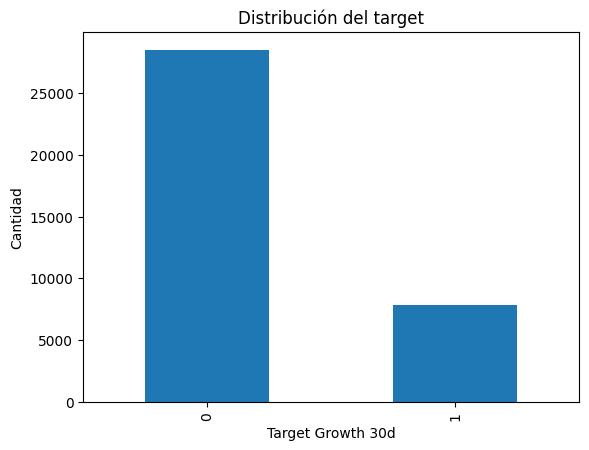

In [8]:
df['target_growth_30d'].value_counts().plot(kind='bar', title='Distribución del target')
plt.xlabel('Target Growth 30d')
plt.ylabel('Cantidad')

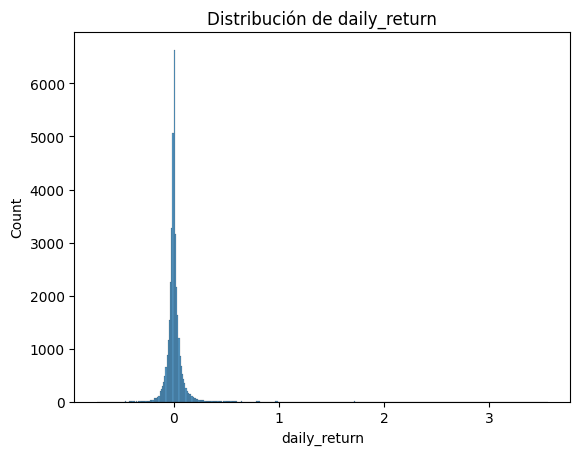

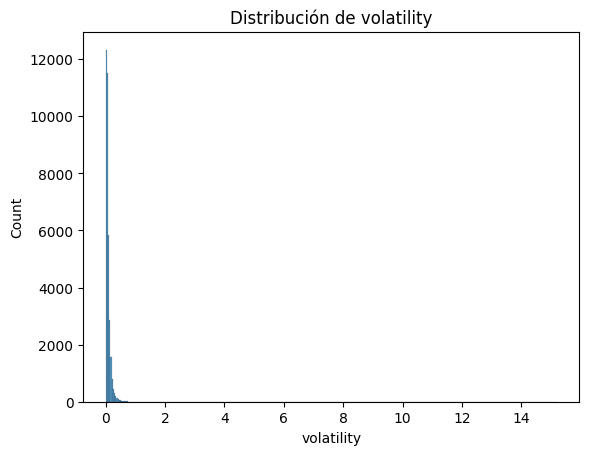

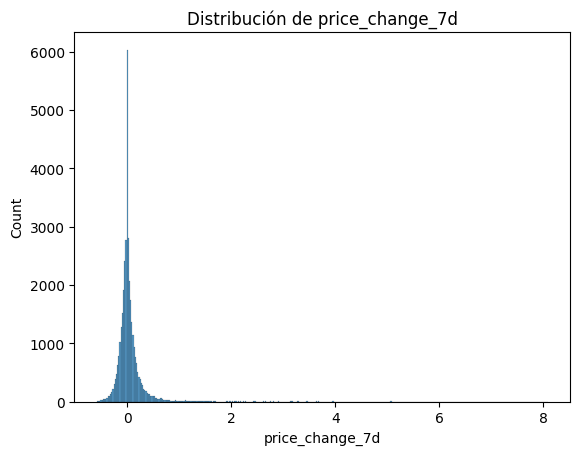

In [ ]:
# muestra la distribución de las variables numéricas

vars_to_plot = ['daily_return', 'volatility', 'price_change_7d']

for col in vars_to_plot:
    sns.histplot(df[col])
    plt.title(f'Distribución de {col}')
    plt.show()

### Visualizacion temporal

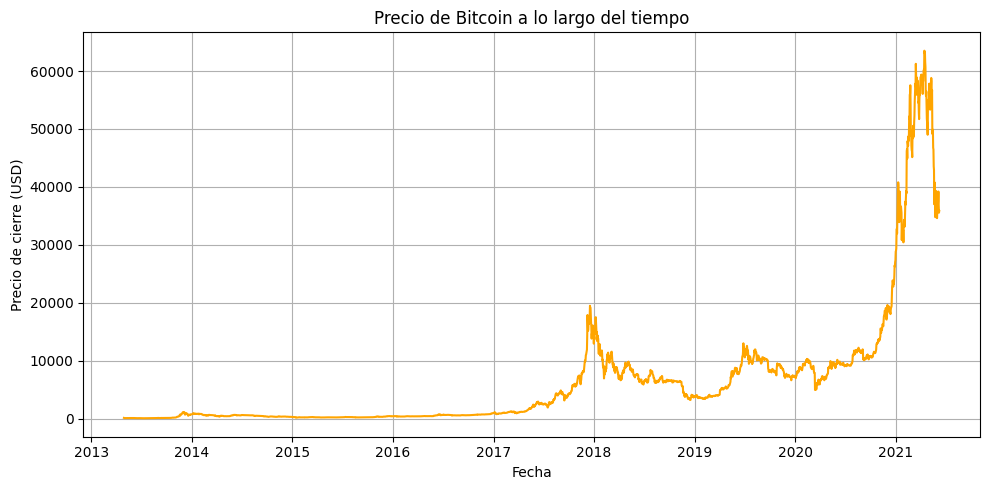

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

btc = df[df['Name'] == 'Bitcoin']

plt.figure(figsize=(10, 5))
plt.plot(btc['Date'], btc['Close'], color='orange')
plt.title('Precio de Bitcoin a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

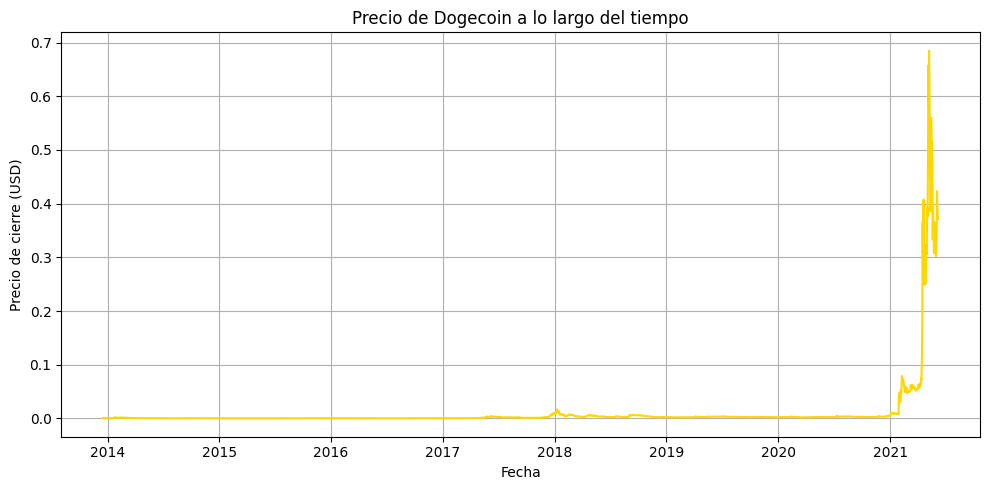

In [4]:
doge = df[df['Name'] == 'Dogecoin']

plt.figure(figsize=(10, 5))
plt.plot(doge['Date'], doge['Close'], color='gold')
plt.title('Precio de Dogecoin a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

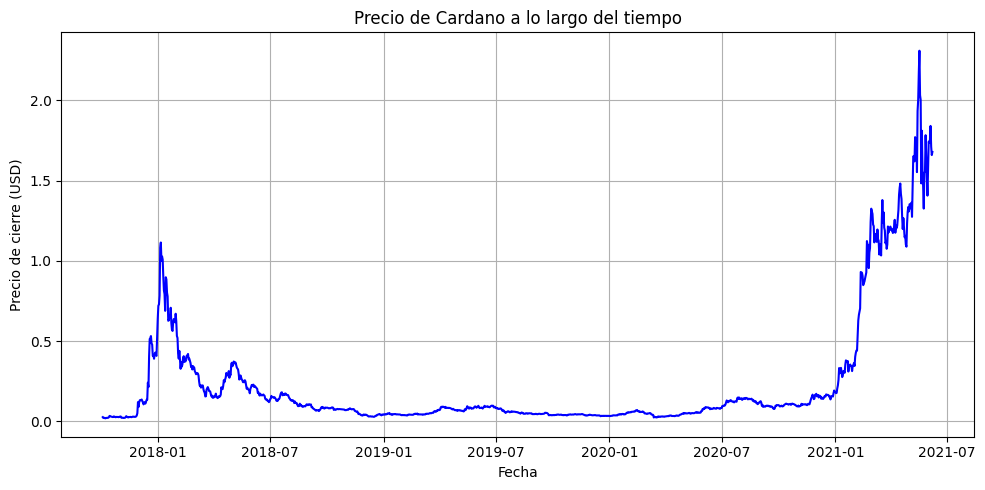

In [5]:
ada = df[df['Name'] == 'Cardano']

plt.figure(figsize=(10, 5))
plt.plot(ada['Date'], ada['Close'], color='blue')
plt.title('Precio de Cardano a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualizacion bivariada

In [16]:
df.groupby('target_growth_30d')[['daily_return', 'volatility', 'volume_change_1d']].mean()

,daily_return,volatility,volume_change_1d
target_growth_30d,,,
0,0.002812,0.075273,inf
1,0.011426,0.099800,inf


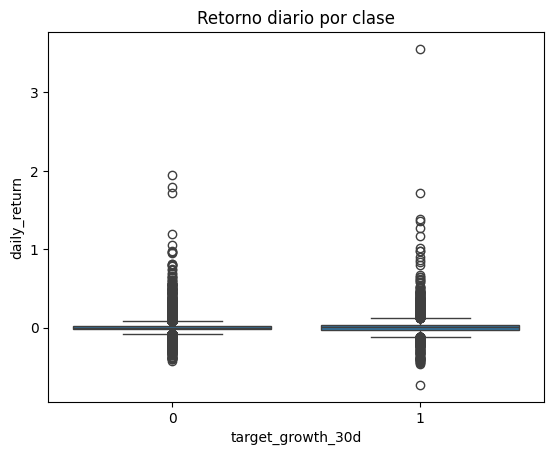

In [17]:
sns.boxplot(data=df, x='target_growth_30d', y='daily_return')
plt.title("Retorno diario por clase")
plt.show()


### Matriz de correlacion

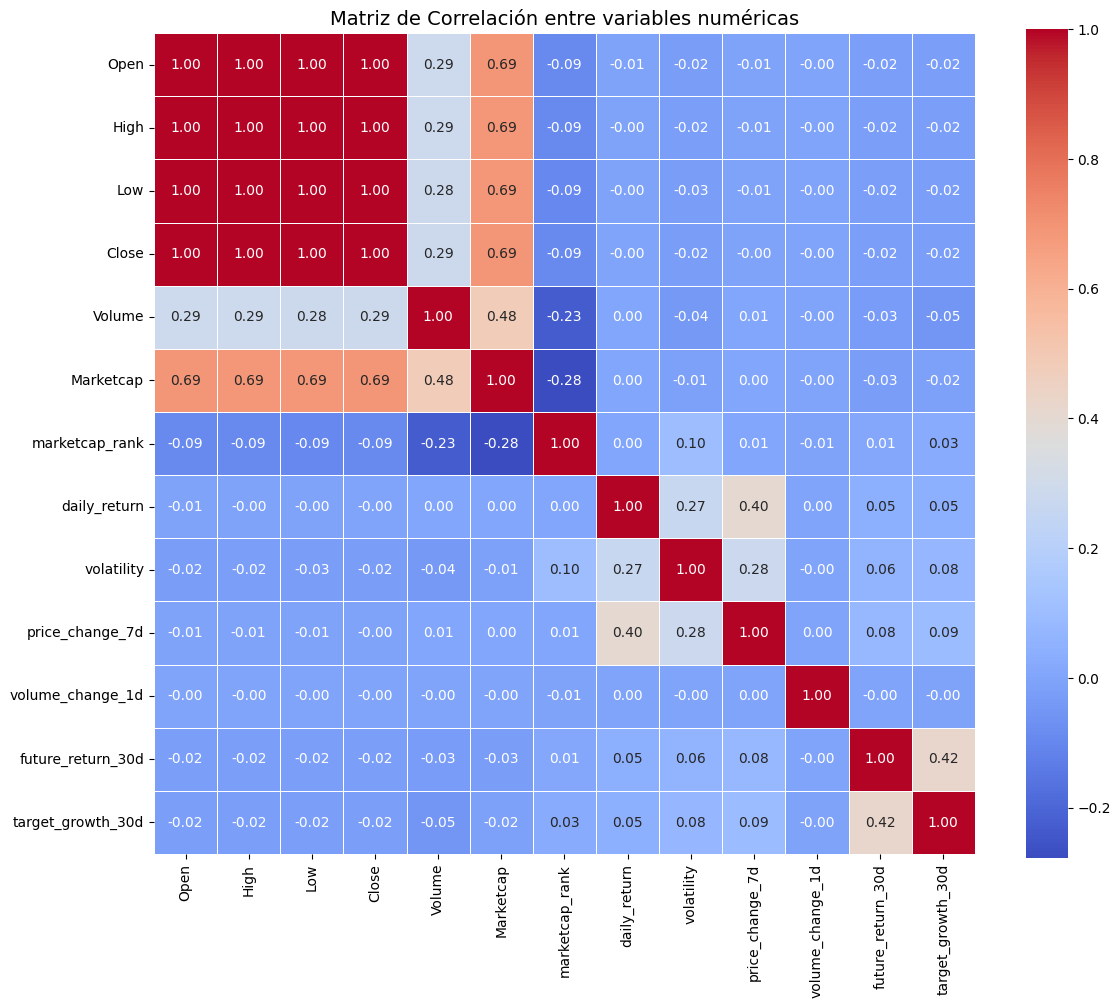

In [ ]:
# solo las variables numericas
numeric_cols = [
    'Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap',
    'marketcap_rank', 'daily_return', 'volatility',
    'price_change_7d', 'volume_change_1d',
    'future_return_30d', 'target_growth_30d'
]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Matriz de Correlación entre variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# variables numericas a filtrar
cols_to_filter = ['daily_return', 'volatility', 'price_change_7d', 'volume_change_1d']

# Aplicamos filtro IQR a cada columna
for col in cols_to_filter:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = df.shape[0]
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    after = df.shape[0]
    print(f"Columna '{col}': eliminados {before - after} outliers")

# Guarda el nuevo dataset limpio
df.to_csv('cryptos_filtrado_sin_outliers.csv', index=False)
print("Dataset limpio guardado como 'cryptos_filtrado_sin_outliers.csv'")


Columna 'daily_return': eliminados 821 outliers
Columna 'volatility': eliminados 249 outliers
Columna 'price_change_7d': eliminados 547 outliers
Columna 'volume_change_1d': eliminados 187 outliers
Dataset limpio guardado como 'cryptos_filtrado_sin_outliers.csv'


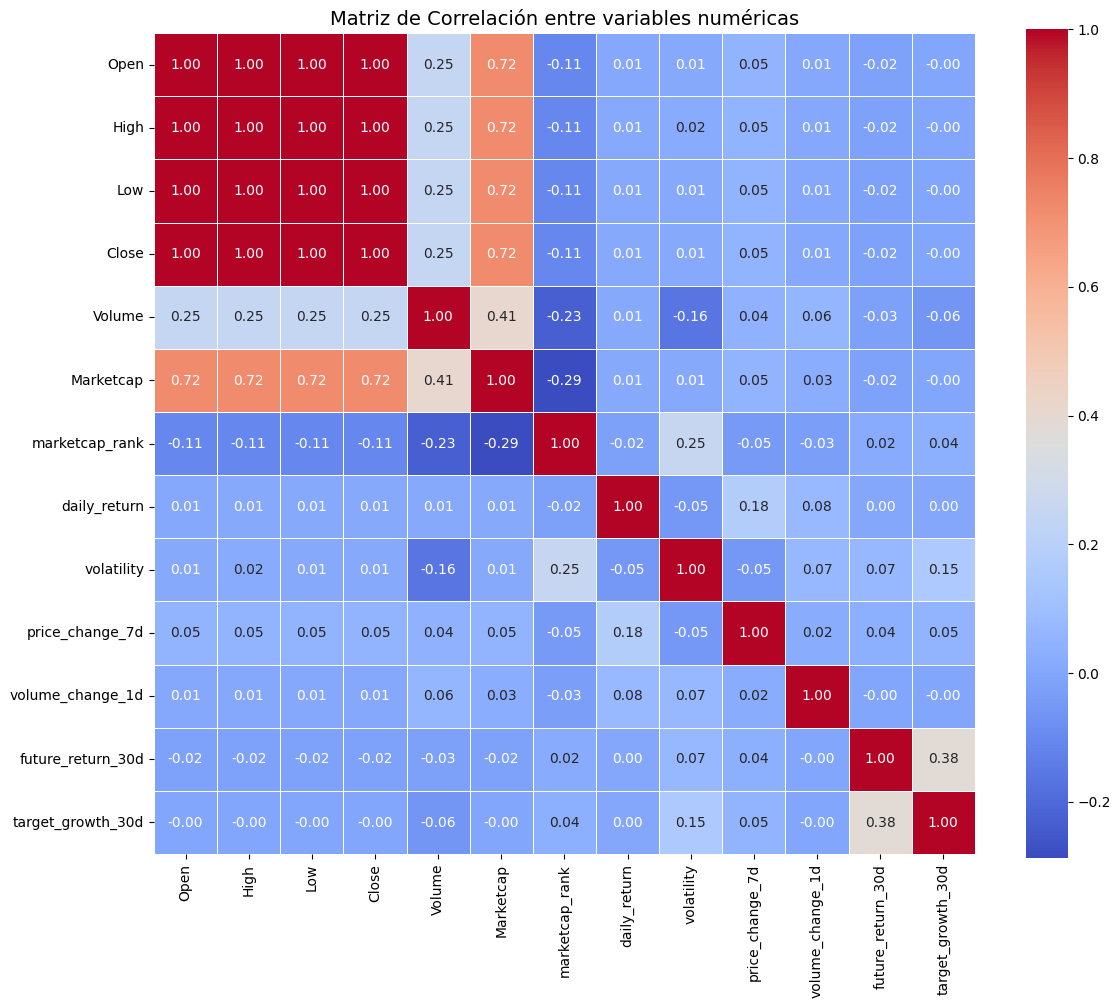

In [ ]:
df_filtrado = pd.read_csv('../data/cryptos_filtrado_sin_outliers.csv')

# solo las variables numericas
numeric_cols = [
    'Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap',
    'marketcap_rank', 'daily_return', 'volatility',
    'price_change_7d', 'volume_change_1d',
    'future_return_30d', 'target_growth_30d'
]

corr_matrix = df_filtrado[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Matriz de Correlación entre variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()